In [1]:
import os
import pyspark

from pymongo import MongoClient

In [2]:
conf = pyspark.SparkConf()
conf.set('spark.ui.proxyBase', '/user/' + os.environ['JUPYTERHUB_USER'] + '/proxy/4040')

sc = pyspark.SparkContext(conf=conf)
spark = pyspark.sql.SparkSession(sc)
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/09 13:26:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
username = "vt2182"
password = "vt2182"
host = "mongo-csgy-6513-spring.db"
auth_database = "vt2182"

In [4]:
mongo_conn_str = f"mongodb://{username}:{password}@{host}/{auth_database}"
client = MongoClient(mongo_conn_str)

In [5]:
db = client[auth_database]
db

Database(MongoClient(host=['mongo-csgy-6513-spring.db:27017'], document_class=dict, tz_aware=False, connect=True), 'vt2182')

In [6]:
db.list_collection_names()

['yellow_tripdata_raw', 'yellow_tripdata']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Get the collection
collection = db['yellow_tripdata']

In [9]:
# Fetch data from MongoDB, excluding the _id field
data = list(collection.find({}, {'_id': 0}))

In [10]:
# Convert list of dictionaries to pandas DataFrame
pandas_df = pd.DataFrame(data)

In [11]:
# Convert pandas DataFrame to Spark DataFrame
df = spark.createDataFrame(pandas_df)

/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [12]:
# Count the number of rows
print("The data contains {} rows.".format(df.count()))

23/05/09 13:26:58 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


23/05/09 13:27:01 WARN TaskSetManager: Stage 0 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


The data contains 115832 rows.


In [13]:
df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- pickup_year: long (nullable = true)
 |-- pickup_month: long (nullable = true)
 |-- pickup_day: long (nullable = true)
 |-- pickup_hour

In [14]:
df.head()

23/05/09 13:27:09 WARN TaskSetManager: Stage 3 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


Row(VendorID=2, tpep_pickup_datetime=datetime.datetime(2022, 12, 3, 19, 14, 47), tpep_dropoff_datetime=datetime.datetime(2022, 12, 3, 19, 31, 51), passenger_count=1.0, trip_distance=3.37, RatecodeID=1.0, store_and_fwd_flag='N', PULocationID=143, DOLocationID=152, payment_type=1, fare_amount=13.5, extra=0.5, mta_tax=0.5, tip_amount=3.46, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=20.76, congestion_surcharge=2.5, airport_fee=0.0, pickup_year=2022, pickup_month=12, pickup_day=3, pickup_hour=19, pickup_day_of_week=7, dropoff_year=2022, dropoff_month=12, dropoff_day=3, dropoff_hour=19, dropoff_day_of_week=7)

In [15]:
df.limit(5).toPandas()

23/05/09 13:27:10 WARN TaskSetManager: Stage 4 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_day_of_week,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_day_of_week
0,2,2022-12-03 19:14:47,2022-12-03 19:31:51,1.0,3.37,1.0,N,143,152,1,...,2022,12,3,19,7,2022,12,3,19,7
1,2,2022-12-01 11:55:12,2022-12-01 12:18:01,6.0,1.00,1.0,N,100,230,2,...,2022,12,1,11,5,2022,12,1,12,5
2,1,2022-12-12 15:54:24,2022-12-12 15:59:52,1.0,1.90,1.0,N,236,74,1,...,2022,12,12,15,2,2022,12,12,15,2
3,1,2022-12-20 05:34:23,2022-12-20 06:14:12,1.0,0.10,99.0,N,242,242,1,...,2022,12,20,5,3,2022,12,20,6,3
4,2,2022-12-10 03:59:40,2022-12-10 04:07:27,1.0,1.99,1.0,N,24,236,1,...,2022,12,10,3,7,2022,12,10,4,7


From the schema, the following features could be relevant for predicting the taxi fare:

- `trip_distance`: The distance of the trip is likely to be a strong predictor of the fare.
- `RatecodeID`: Different rate codes could correspond to different fare structures.
- `PULocationID` and `DOLocationID`: The pickup and dropoff locations could affect the fare.
- `pickup_hour`, `pickup_day`, `pickup_day_of_week`, `pickup_month`: The time of pickup could affect the fare, due to factors like traffic and surge pricing.
- `passenger_count`: It's unlikely that the number of passengers would directly affect the fare for a standard taxi ride, but it's possible that rides with many passengers are more likely to be longer trips, for example.
- `extra`, `mta_tax`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge`, `airport_fee`: These are likely to be components of the total fare and may be useful predictors.

- `fare_amount` is our target variable.



In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Select features
feature_columns = ["trip_distance", "RatecodeID", "PULocationID", "DOLocationID", 
                   "pickup_hour", "pickup_day", "pickup_day_of_week", "pickup_month", 
                   "passenger_count", "extra", "mta_tax", "tolls_amount", 
                   "improvement_surcharge", "congestion_surcharge", "airport_fee"]

# Assemble features into a single column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Split the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Initialize the model
lr = LinearRegression(featuresCol="features", labelCol="fare_amount")

# Fit the model
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

23/05/09 13:34:34 WARN Instrumentation: [27522ae8] regParam is zero, which might cause numerical instability and overfitting.
23/05/09 13:34:35 WARN TaskSetManager: Stage 5 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 13:34:43 WARN TaskSetManager: Stage 6 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


In [19]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize evaluators
rmse_evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
mae_evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="mae")
r2_evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="r2")

# Compute metrics
rmse = rmse_evaluator.evaluate(predictions)
mae = mae_evaluator.evaluate(predictions)
r2 = r2_evaluator.evaluate(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

23/05/09 13:37:57 WARN TaskSetManager: Stage 7 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 13:38:00 WARN TaskSetManager: Stage 8 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 13:38:03 WARN TaskSetManager: Stage 9 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


RMSE: 6.809829968857727
MAE: 2.8062374091997806
R2: 0.7607299133380473


We can further refine the model using
- Feature Engineering
- Handle Categorical Variables
- Use a Different Model
- Hyperparameter Tuning
- Cross-Validation

23/05/09 13:43:20 WARN TaskSetManager: Stage 10 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


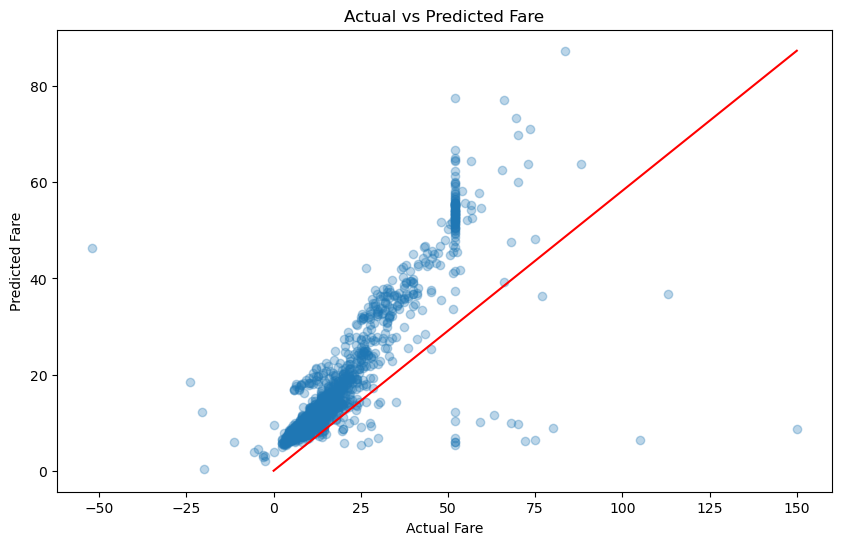

In [20]:
import matplotlib.pyplot as plt

# Take a sample of the data
sample_data = predictions.select("fare_amount", "prediction").sample(False, 0.1).toPandas()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['fare_amount'], sample_data['prediction'], alpha=0.3)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.plot([0, max(sample_data['fare_amount'])], [0, max(sample_data['prediction'])], color='red')
plt.title('Actual vs Predicted Fare')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load data into a pandas DataFrame
df_python = pd.read_parquet('data/yellow_taxi.parquet')

# Prepare the feature matrix X and target array y
X = df_python[['trip_distance', 'passenger_count']].values
y = df_python['fare_amount'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and compute RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")
